<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Siquihua Tanguila, Jhimy Roldan** <--- CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS

**24-02-2022**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [2]:
def download_pubmed (keyword):
    """
    En esta parte del ejercicio se procedio con la función a la busqueda y la visualización de los resultados 
    en una lista de ID procedente de la busqueda en pubmed
    """
    from Bio import Entrez
    from Bio import SeqIO
    from Bio import GenBank
    Entrez.email = 'jhimy.siquihua@est.ikiam.edu.ec'
    handle = Entrez.esearch(db='pubmed',
                        sort='relevance',
                        retmax='200',
                        retmode='xml',
                        term=keyword)
    results = Entrez.read(handle)
    id_list = results["IdList"]
    ids = ','.join(id_list)
    Entrez.email = 'jhimy.siquihua@est.ikiam.edu.ec'
    handle = Entrez.efetch(db='pubmed',
                       retmode='xml',
                       id=ids)
    lista_id = ids.split(",")
    return (lista_id) 


import csv
import re
import pandas as pd
from collections import Counter

def mining_pubs(tipo):
    """ 
    Dicha funcion tiene como objetivo la entrada de las tres diferentes variables denominadas como "DP", "AU" y "AD" 
    y como resultado muestra un archivo de dataframe
    """
    with open("pubmed-EcuadorGen-set.txt", errors="ignore") as f: 
        texto = f.read() 
    if tipo == "DP":
        PMID = re.findall("PMID- (\d*)", texto) 
        year = re.findall("DP\s{2}-\s(\d{4})", texto)
        pmid_y = pd.DataFrame()
        pmid_y["PMID"] = PMID
        pmid_y["Año de publicación"] = year
        return (pmid_y)
    elif tipo == "AU": 
        PMID = re.findall("PMID- (\d*)", texto) 
        autores = texto.split("PMID- ")
        autores.pop(0)
        num_autores = []
        for i in range(len(autores)):
            numero = re.findall("AU -", autores[i])
            n = (len(numero))
            num_autores.append(n)
        pmid_a = pd.DataFrame()
        pmid_a["PMID"] = PMID 
        pmid_a["Cantidad de autores"] = num_autores
        return (pmid_a)
    elif tipo == "AD": 
        texto = re.sub(r" [A-Z]{1}\.","", texto)
        texto = re.sub(r"Av\.","", texto)
        texto = re.sub(r"Vic\.","", texto)
        texto = re.sub(r"Tas\.","", texto)
        AD = texto.split("AD  - ")
        n_paises = []
        for i in range(len(AD)): 
            pais = re.findall("\S, ([A-Za-z]*)\.", AD[i])
            if not pais == []: 
                if not len(pais) >= 2:  
                    if re.findall("^[A-Z]", pais[0]): 
                        n_paises.append(pais[0])
        conteo=Counter(n_paises)
        resultado = {}
        for clave in conteo:
            valor = conteo[clave]
            if valor != 1: 
                resultado[clave] = valor 
        veces_pais = pd.DataFrame()
        veces_pais["pais"] = resultado.keys()
        veces_pais["cantidad de autores"] = resultado.values()
        return (veces_pais)

import miningscience as msc
help(download_pubmed)
help(mining_pubs)

Help on function download_pubmed in module __main__:

download_pubmed(keyword)
    En esta parte del ejercicio se procedio con la función a la busqueda y la visualización de los resultados 
    en una lista de ID procedente de la busqueda en pubmed

Help on function mining_pubs in module __main__:

mining_pubs(tipo)
    Dicha funcion tiene como objetivo la entrada de las tres diferentes variables denominadas como "DP", "AU" y "AD" 
    y como resultado muestra un archivo de dataframe




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [3]:
journals = download_pubmed("Ecuador Genomics")

print ("El numero de articulos es:", len(journals)) 

print ("El PMID del primer articulo es:", journals[0])

El numero de articulos es: 193
El PMID del primer articulo es: 31822297


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [7]:
import miningscience as msc
pub_año = msc.mining_pubs("DP")
print (pub_año.iloc[0:2])
print (pub_año.iloc[680:])
pub_autor = msc.mining_pubs("AU")
print (pub_autor.iloc[0:2])
print (pub_autor.iloc[680:])
countries = msc.mining_pubs("AD")
print (countries.iloc[0:2])
print (countries.iloc[135:])

       PMID Año de publicación
0  19844075               2010
1  31822297               2019
         PMID Año de publicación
680  34163450               2021
681  24920187               2015
682  16607004               2006
683  26903960               2016
684  33807748               2021
..        ...                ...
823  32917887               2020
824  33634602               2021
825  28785301               2017
826  27429642               2016
827  31891233               2020

[148 rows x 2 columns]
       PMID  Cantidad de autores
0  19844075                    2
1  31822297                    3
         PMID  Cantidad de autores
680  34163450                    2
681  24920187                    5
682  16607004                   10
683  26903960                   48
684  33807748                   11
..        ...                  ...
823  32917887                   30
824  33634602                  102
825  28785301                  173
826  27429642                  173
827

## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La media es:  2014.87077294686
La desviación estandar es:  6.804327940706886


Text(0, 0.5, 'Repeticiones')

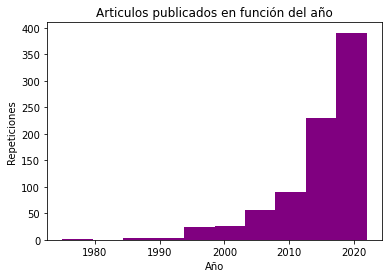

In [10]:
#Parte 1 
import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter
pub_año["Año de publicación"] = pub_año["Año de publicación"].astype("int")
mean_py = pub_año["Año de publicación"].mean()
sd_py = pub_año["Año de publicación"].std()
print ("La media es: ", mean_py)
print ("La desviación estandar es: ", sd_py)
#print (pub_year["Año de publicación"])
intervalos = range(min(pub_año["Año de publicación"]), max(pub_año["Año de publicación"]))
plot.hist(x=pub_año["Año de publicación"], color = "purple")
plot.title("Articulos publicados en función del año")
plot.xlabel("Año")
plot.ylabel("Repeticiones")

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [5]:
# Escriba aquí su código para el ejercicio 6



**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```